# Description and Software Disclaimer

Title: Demonstration of Data Operations for Boundary Isotherms and a single Scanning Isotherm in "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown

Software Description: This notebook demonstrates data ingest and processing scripts for data provided in <ins>Digitization and Processing of Adsorption Isotherms from "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown, PhD Dissertation, University of Bristol (UK), 1963</ins>.

Author: Daniel W. Siderius, PhD

------------VERSION HISTORY----------------
<br>
<br>2021-09016:   v 1.0 (initial release)

------------SOFTWARE DISCLAIMER AND REDISTRIBUTION CONDITIONS----------------

This software was developed at the National Institute of Standards and Technology by employees of the Federal Government in the course of their official duties. Pursuant to Title 17 Section 105 of the United States Code this software is not subject to copyright protection and is in the public domain. This software is an experimental system. NIST assumes no responsibility whatsoever for its use by other parties, and makes no guarantees, expressed or implied, about its quality, reliability, or any other characteristic. We would appreciate acknowledgement if the software is used.

This software can be redistributed and/or modified freely provided that any derivative works bear some notice that they are derived from it, and any modified versions bear some notice that they have been modified.

------------DECLARATION OF CONFLICTING INTERESTS----------------

Certain commercially available items may be identified in this paper. This identification does not imply recommendation by NIST, nor does it imply that it is the best available for the purposes described.

## User Guide

### Preface
This notebook is a demonstration of interaction with adsorption/desorption isotherm data that was obtained from data tables in:

<ins>The Thermodynamics and Hysteresis of Adsorption</ins>
by A. J. Brown
PhD Dissertation, University of Bristol (UK), 1963

The data used in this demonstration is described in an article published by the National Institute of Standards and Technology (USA):

<ins>Digitization and Processing of Adsorption Isotherms from "The Thermodynamics and Hysteresis of Adsorption" by A. J. Brown, PhD Dissertation, University of Bristol (UK), 1963</ins>
by D. W. Siderius, _J Res NIST_, volume(issue):pages, 2021.  doi


### Usage
This notebook is intended to provide examples of how to read in the boundary isotherm data from the aforementioned dissertation by A. J. Brown and then process the data for plotting and analysis. In this data set, the term "boundary isotherm" is used to describe the equilibrium isotherm that is either (a) the only observable isotherm or (b) the "outer" isotherm composed of the lowest adsorption isotherm and the highest desorption isotherm; e.g., the isotherm traced by beginning a sorption sweep at zero pressure, proceeding to the maximum pressure, and then reversing back to zero pressure.. This is in contrast to the "scanning isotherms" that are measured by changing the sorption direction at a middle pressure, which then traces a path different from the "boundary isotherm."

The source data for the boundary isotherms is provided in a set of flat CSV files stored in "Boundary_Isotherms;" the data columns are self-describing, but are described in more detail in the "tableschema.json" file in this repository. All boundary isotherms for a particular adsorbate species are in a single file; an isotherm at a particular temperature can be extracted by filtering by either the "run_id" or "temperature" columns. All isotherms in the data files are provided as shown in the dissertation data tables; there are inconsistencies in the pressure data formats. Some pressures are given relative to the saturation pressure for that species at the isotherm temperature, other pressures are given in mmHg (torr), and others are presented in the base-10 log of the pressure in mmHg. The custom software that accompanies this notebook provides functions to convert the data into consistent units.

The remainder of this notebook is broken into a sections:

1. Import Required Python Packages
   This step simply imports the generic Python packages required by the notebook
   
2. Import a custom Python Package
   Provides software written specifically for accessing and processing isotherm data in this repository

3. Example ingestion of the boundary isotherm of Xenon and one scanning isotherm of Xenon
   
   
### NOTE:
In developing the software tools in the `support_software` Python module, care has been taken to preserve the numerical precision of measurements presented in A. J. Brown's dissertation when those measurements are processed. Thus, in the initial data ingest step, all data fields are stored as strings so that significant figures are not dropped accidentally (e.g., Python will drop a trailing "0" in a floating-point number). Data conversions are done in the `significant_figures` function, which follows conventional rules for preserving significant figures during multiplication/division and logarithm/anti-logarithm operations.

## 1. Import Python Packages

In [1]:
#End User is responsible for installation of missing packages using an appropriate Python package manager

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys

plt.rcParams.update({'font.size': 16})
from matplotlib.ticker import FormatStrFormatter

## 2. Import Support Software (custom written for this data set)

In [4]:
sys.path.append("..") # assumes that the project-specific support scripts are one directory down
from support_software import *

## 3a. Tools Demonstration: Saturation pressures

In [3]:
# Objective: Ingest the scanning isotherm data; use Pandas native CSV reader
# Follow-up steps: convert 'run_id' and 'segment_id' columns to integer type
#   -> this is necessary because the data is read as strings, to preserve
#      floating point digits

in_filename = '../Scanning_Isotherms/xe_scanning_isotherms.csv'
#in_filename += '.edited'

df = pd.read_csv(in_filename, keep_default_na=False, dtype=str)
df['run_id'] = df['run_id'].astype(int)
df['segment_id'] = df['segment_id'].astype(int)

## 3. Tools Demonstration: Extract a single boundary isotherm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


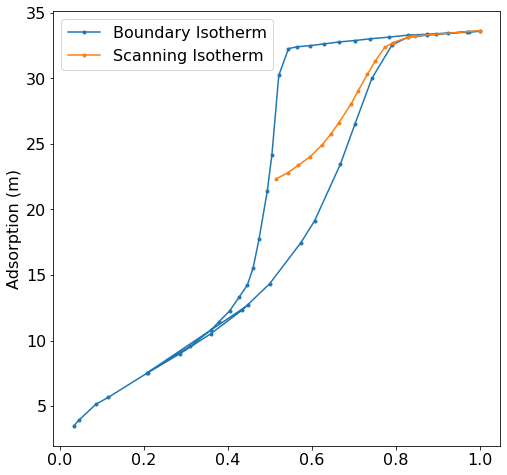

In [17]:
filename = '../Scanning_Isotherms/xe_scanning_isotherms.csv'

fig = plt.figure(figsize=(8,8))

# Boundary Isotherm
isotherm = read_isotherm_flat_CSV(filename,run_id=1,segment_id=0)
p = [float(x['pressure']) for x in isotherm['isotherm_data']]
ads = [float(x['adsorption']) for x in isotherm['isotherm_data']]
plt.plot(p,ads,'.-',label='Boundary Isotherm')

# Primary Scanning Isotherm
isotherm = read_isotherm_flat_CSV(filename,run_id=2,segment_id=7)
p = [float(x['pressure']) for x in isotherm['isotherm_data'] if x['branch']=='A']
ads = [float(x['adsorption']) for x in isotherm['isotherm_data'] if x['branch']=='A']
plt.plot(p,ads,'.-',label='Scanning Isotherm')

yunits = isotherm['adsorptionUnits'][0]
xunits = isotherm['pressureUnits'][0]

plt.ylabel('Adsorption ('+yunits+')')
if xunits == 'relative':
    plt.xlabel(r'$p/p_0$')

plt.legend()
plt.savefig('example_processing.eps',bbox_inches='tight')
plt.show()
